# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [212]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint #importing pprint
import requests as req
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [213]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
        
# Print the city count to confirm sufficient count 
# added countries to test citypy

len(countries),len(cities)

(628, 628)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [214]:
# Using Openweather API to get the weather data needed from those cities.
# Save config information (from lesson 06/2/ activity 07 - weather stats)

# Create base URL and indicate metric units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#Build partial query URL
query = f"{url}appid={weather_api_key}&units={units}&q="


# preparing empty variables
city_name =[]
temp = []
hum = []
cloud = []
wind = []
lat = []
long = []
country_code =[]

for a0 in range(len(cities)):
    response = requests.get(f"{query}{cities[a0]}").json()
# there's no data for some of the cities in openweathermap, adding exception handle for this
    try:
        city_name.append(response['name'])
        country_code.append(response['sys']['country'])                                             
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])   
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        
    except KeyError:
        city_name.append(np.nan)
        country_code.append(np.nan)
        temp.append(np.nan)
        hum.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        lat.append(np.nan)
        long.append(np.nan)
    
# set clouds and wind to zero when its not cloudy/windy
    try:
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        cloud.append(0)
        wind.append(0)
        
    print("--------------------------------------------")
    print("Beggining Data Retrival")
    print("--------------------------------------------") 
    # Print city name and query string    
    print(f"Processing record {a0 + 1} | {cities[a0]}")
    print(f" {query} {cities[a0]}")
    

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 1 | dolbeau
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= dolbeau
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 2 | rikitea
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= rikitea
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 3 | kapaa
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= kapaa
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 4 | dikson
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&uni

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 33 | kahului
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= kahului
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 34 | te anau
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= te anau
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 35 | hermanus
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= hermanus
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 36 | east london
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 65 | aleksandrovka
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= aleksandrovka
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 66 | lakes entrance
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= lakes entrance
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 67 | cabo san lucas
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= cabo san lucas
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 68 | fort nelson
 http://api.openweathermap.org/data/2

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 97 | eyl
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= eyl
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 98 | havoysund
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= havoysund
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 99 | matara
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= matara
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 100 | tocopilla
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f23

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 129 | chuy
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= chuy
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 130 | khorixas
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= khorixas
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 131 | juruti
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= juruti
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 132 | boa vista
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 161 | storforshei
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= storforshei
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 162 | port alfred
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= port alfred
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 163 | san francisco
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= san francisco
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 164 | jablah
 http://api.openweathermap.org/data/2.5/weather?ap

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 193 | osa
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= osa
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 194 | port elizabeth
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= port elizabeth
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 195 | vila velha
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= vila velha
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 196 | mobaye
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 225 | bidar
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= bidar
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 226 | birao
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= birao
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 227 | kalmunai
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= kalmunai
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 228 | novopokrovka
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 257 | richards bay
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= richards bay
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 258 | tete
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= tete
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 259 | torbay
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= torbay
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 260 | thilogne
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f1

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 289 | neijiang
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= neijiang
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 290 | el tigre
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= el tigre
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 291 | west bay
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= west bay
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 292 | puerto escondido
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc9940

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 321 | fort frances
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= fort frances
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 322 | ponta delgada
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= ponta delgada
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 323 | amazar
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= amazar
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 324 | opuwo
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc9

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 353 | dunmore town
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= dunmore town
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 354 | lagoa
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= lagoa
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 355 | katesh
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= katesh
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 356 | mount darwin
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c0

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 386 | vao
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= vao
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 387 | lukang
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= lukang
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 388 | molochnoye
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= molochnoye
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 389 | nouadhibou
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 418 | rutland
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= rutland
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 419 | san patricio
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= san patricio
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 420 | felipe carrillo puerto
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= felipe carrillo puerto
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 421 | kupang
 http://api.openweathermap.org/data/2.

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 450 | ola
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= ola
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 451 | znamenskoye
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= znamenskoye
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 452 | coromandel
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= coromandel
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 453 | jiangyou
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c081

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 482 | kikwit
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= kikwit
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 483 | whitianga
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= whitianga
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 484 | vorukh
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= vorukh
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 485 | mendahara
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 514 | bafoulabe
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= bafoulabe
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 515 | bull savanna
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= bull savanna
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 516 | bud
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= bud
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 517 | abha
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f1

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 547 | shimoda
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= shimoda
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 548 | lesnoy
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= lesnoy
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 549 | dondo
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= dondo
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 550 | melilla
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 579 | turukhansk
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= turukhansk
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 580 | bolpur
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= bolpur
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 581 | cornwall
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= cornwall
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 582 | umzimvubu
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 611 | dicabisagan
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= dicabisagan
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 612 | kieta
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= kieta
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 613 | xunchang
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c08163f13c0b407f2379&units=imperial&q= xunchang
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 614 | wang noi
 http://api.openweathermap.org/data/2.5/weather?appid=3dcc99406894c081

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [215]:
#limiting to 500
weather_df = pd.DataFrame({"City": city_name[0:500],
                           "Country": countries[0:500],
                           "Latitude": lat[0:500],
                           "Longitude": long[0:500],
                           "Humidity": hum[0:500],
                           "Temperature": temp[0:500],
                           "Cloudiness": cloud[0:500],
                           "Wind Speed": wind[0:500]
                          })

weather_df = weather_df.dropna(how='any')

#Save dataframe as csv
pd.DataFrame.to_csv(weather_df, 'weather_data.csv',)

weather_df.head()

,City,Country,Latitude,Longitude,Humidity,Temperature,Cloudiness,Wind Speed
1,Rikitea,pf,-23.12,-134.97,78.0,70.05,0.0,0.00
2,Kapaa,us,22.08,-159.32,69.0,82.40,100.0,11.48
3,Dikson,ru,73.51,80.55,69.0,25.08,100.0,11.48
4,Bluff,nz,-23.58,149.07,11.0,100.40,90.0,9.17
5,Antalaha,mg,-14.90,50.28,91.0,70.48,90.0,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

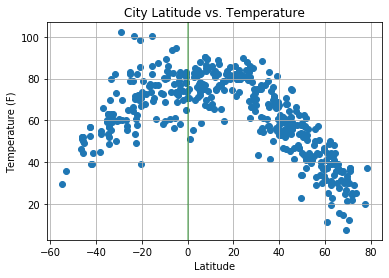

In [216]:
#Plot latitude vs temperature
plt.scatter(weather_df['Latitude'], weather_df['Temperature'])
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)


#save as .png
plt.savefig('lattitude_vs_temp.png', bbox_inches='tight')

Comment: 

As expected, Weather becomes warmer as we approach the equater and similar temperature at around latitude +/- 40

#### Latitude vs. Humidity Plot

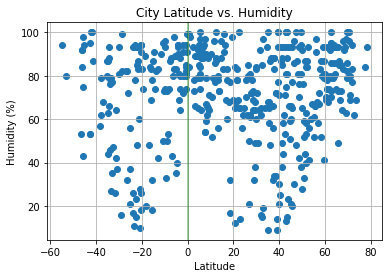

In [217]:
#Plot latitude vs humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)


#save as png
plt.savefig('lat_humid.png', bbox_inches='tight')

There is not much relationship between latitude and humidity for latitude higher than 20 degree (north or south) where the humidity is slightly higher, data points are very randomly distributed

#### Latitude vs. Cloudiness Plot

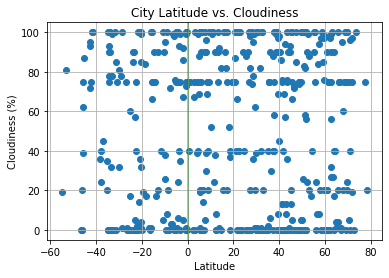

In [218]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)

# save as png
plt.savefig('lat_cloud.png', bbox_inches='tight')

This plot is very ramdly distributed depicting the lack relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

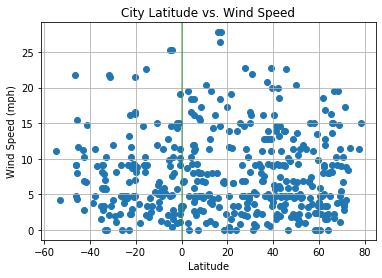

In [219]:
#Plot latitude vs wind speed
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)

#save as png
plt.savefig('lat_wind.png', bbox_inches='tight')

Wind speed seems to be very constant and independent of the latitude

In [220]:
#Linear Regression

# Create Northern and Southern Hemisphere DataFrames
 
north_df = weather_df[weather_df['Latitude']>0]
south_df = weather_df[weather_df['Latitude']<0]

In [221]:
south_df

,City,Country,Latitude,Longitude,Humidity,Temperature,Cloudiness,Wind Speed
1,Rikitea,pf,-23.12,-134.97,78.0,70.05,0.0,0.00
4,Bluff,nz,-23.58,149.07,11.0,100.40,90.0,9.17
5,Antalaha,mg,-14.90,50.28,91.0,70.48,90.0,9.17
6,Atuona,pf,-9.80,-139.03,74.0,79.64,26.0,6.67
9,Ushuaia,ar,-54.81,-68.31,94.0,29.60,19.0,11.03
11,Necochea,ar,-38.55,-58.74,57.0,44.94,36.0,3.76
12,Cidreira,br,-30.17,-50.22,93.0,60.53,32.0,11.99
14,Vera Cruz,br,-12.96,-38.61,83.0,77.00,90.0,3.36
15,Cape Town,za,-33.93,18.42,76.0,59.00,90.0,3.36
16,Namibe,ao,-15.19,12.15,87.0,69.06,75.0,3.36


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 20, 'Temp = -0.8xLat +89.69')

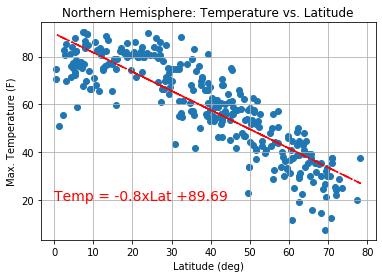

In [222]:
plt.scatter(north_df['Latitude'],north_df['Temperature'])
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Max. Temperature (F)')
plt.grid(True)

(slope01, int01, r01, p01, std_err01) = stats.linregress(north_df['Latitude'],north_df['Temperature'])
fit01 = (slope01 * north_df['Latitude']) + int01
plt.plot(north_df['Latitude'], fit01,"r-.")

eq_01 = "Temp = " + str(round(slope01,2)) + "xLat +" + str(round(int01,2))
plt.text(0, 20, eq_01, color= 'red', fontsize = 14)

In [223]:
print(f"The r-squared is: {r01**2}")

The r-squared is: 0.7349520292272321


### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-36, 32, 'Lat = 0.63xTemp +81.55')

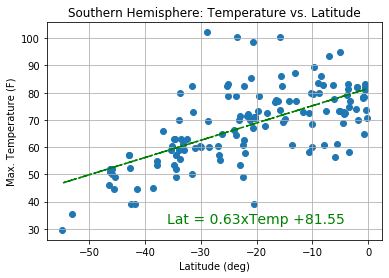

In [224]:
plt.scatter(south_df['Latitude'],south_df['Temperature'])
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Max. Temperature (F)')
plt.grid(True)

(slope02, int02, r02, p02, std_err02) = stats.linregress(south_df['Latitude'], south_df['Temperature'])
fit02 = (slope02 * south_df['Latitude']) + int02
plt.plot(south_df['Latitude'], fit02,"g-.")

eq_02 = "Lat = " + str(round(slope02,2)) + "xTemp +" + str(round(int02,2))
plt.text(-36, 32, eq_02, color= 'green', fontsize = 14)

In [225]:
print(f"The r-squared is: {r02**2}")

The r-squared is: 0.4166252287078832


### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(30, 10, 'Hum = 0.01xLat +71.81')

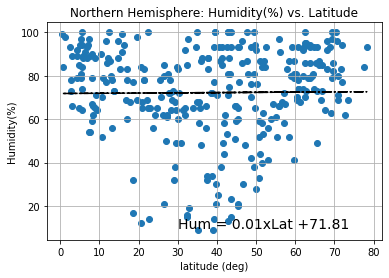

In [226]:
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.title('Northern Hemisphere: Humidity(%) vs. Latitude')
plt.xlabel('latitude (deg)')
plt.ylabel('Humidity(%)')
plt.grid(True)

(slope03, int03, r03, p03, std_err03) = stats.linregress(north_df['Latitude'],north_df['Humidity'])
fit03 = (slope03 * north_df['Latitude']) + int03
plt.plot(north_df['Latitude'], fit03,"k-.")

eq_03 = "Hum = " + str(round(slope03,2)) + "xLat +" + str(round(int03,2))
plt.text(30, 10, eq_03, color= 'k' ,fontsize = 14)

In [227]:
print(f"The r-squared is: {r03**2}")

The r-squared is: 0.00010277349404154231


### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-18, 13, 'Lat = 0.17xHum +73.55')

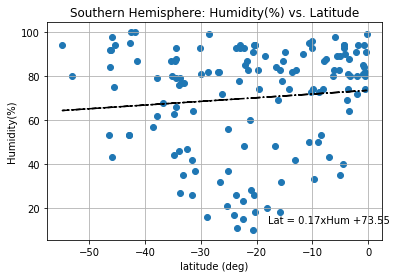

In [228]:
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.title('Southern Hemisphere: Humidity(%) vs. Latitude')
plt.xlabel('latitude (deg)')
plt.ylabel('Humidity(%)')
plt.grid(True)

(slope04, int04, r04, p04, std_err04) = stats.linregress(south_df['Latitude'],south_df['Humidity'])
fit04 = (slope04 * south_df['Latitude']) + int04
plt.plot(south_df['Latitude'], fit04,"k-.")

eq_04 = "Lat = " + str(round(slope04,2)) + "xHum +" + str(round(int04,2))
plt.text(-18, 13, eq_04, color= 'k' ,fontsize = 10)

In [229]:
print(f"The r-squared is: {r04**2}")

The r-squared is: 0.009219579269264639


### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(85, 10, 'Cloud = -0.13xLat +56.59')

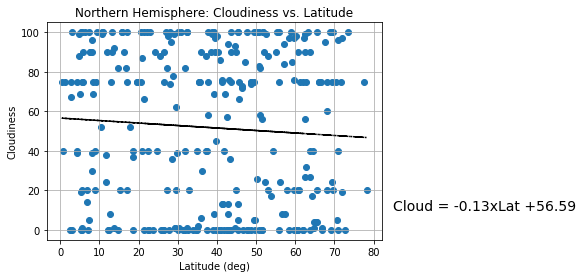

In [230]:
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness')
plt.grid(True)

(slope05, int05, r05, p05, std_err05) = stats.linregress(north_df['Latitude'],north_df['Cloudiness'])
fit05 = (slope05 * north_df['Latitude']) + int05
plt.plot(north_df['Latitude'], fit05,"k-.")

eq_05 = "Cloud = " + str(round(slope05,2)) + "xLat +" + str(round(int05,2))
plt.text(85, 10, eq_05, color= 'k' ,fontsize = 14)

In [231]:
print(f"The r-squared is: {r05**2}")

The r-squared is: 0.004411577772268001


### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(5, 0.9, 'Cloud = -0.13xLat +56.59')

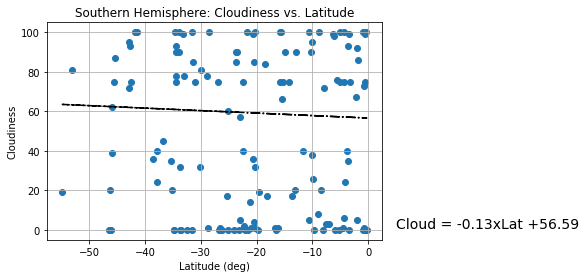

In [232]:
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness')
plt.grid(True)

(slope06, int06, r06, p06, std_err06) = stats.linregress(south_df['Latitude'],south_df['Cloudiness'])
fit05 = (slope05 * south_df['Latitude']) + int05
plt.plot(south_df['Latitude'], fit05,"k-.")

eq_05 = "Cloud = " + str(round(slope05,2)) + "xLat +" + str(round(int05,2))
plt.text(5, 0.9, eq_05, color= 'k' ,fontsize = 14)

In [233]:
print(f"The r-squared is: {r05**2}")

The r-squared is: 0.004411577772268001


### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(10, 30, 'WSpeed = -0.02xLat +8.62')

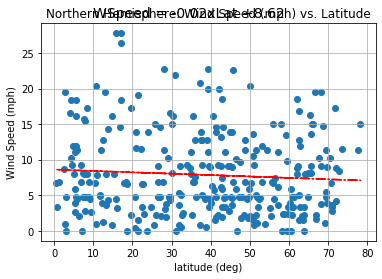

In [234]:
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.title('Northern Hemisphere: Wind Speed (mph) vs. Latitude')
plt.xlabel('latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

(slope06, int06, r06, p06, std_err06) = stats.linregress(north_df['Latitude'],north_df['Wind Speed'])
fit06 = (slope06 * north_df['Latitude']) + int06
plt.plot(north_df['Latitude'], fit06,"r-.")

eq_06 = "WSpeed = " + str(round(slope06,2)) + "xLat +" + str(round(int06,2))
plt.text(10, 30, eq_06, color= 'k' ,fontsize = 14)

In [235]:
print(f"The r-squared is: {r06**2}")

The r-squared is: 0.0049162714465963925


### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-40, 30, 'WSpeed = 0.0xLat +7.6')

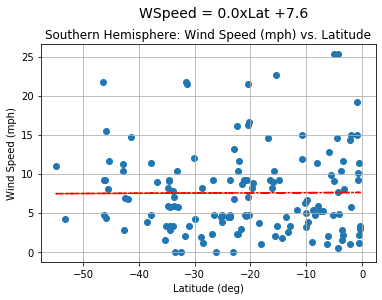

In [236]:
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.title('Southern Hemisphere: Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

(slope07, int07, r07, p07, std_err07) = stats.linregress(south_df['Latitude'],south_df['Wind Speed'])
fit07 = (slope07 * south_df['Latitude']) + int07
plt.plot(south_df['Latitude'], fit07,"r-.")

eq_07 = "WSpeed = " + str(round(slope07,2)) + "xLat +" + str(round(int07,2))
plt.text(-40, 30, eq_07, color= 'k' ,fontsize = 14)

In [237]:
print(f"The r-squared is: {r07**2}")

The r-squared is: 4.715406359166197e-05
